In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import csv


In [12]:
def parse_museums(html):
    soup = BeautifulSoup(html, 'html.parser')
    museum_data = []

    for museum_block in soup.find_all('div', class_='ob-block'):
        try:
            title = museum_block.select_one('.ob-tz').text.strip()
            description = museum_block.select_one('.ob-ta').text.strip()
            city_link = museum_block.select_one('.city-href')
            city = city_link.text.strip() if city_link else "N/A"
            museum_link = museum_block.select_one('.ob-href')['href']
            museum_url = "https://wikiway.com" + museum_link


            museum_data.append([title, description, city, museum_url])
        except (AttributeError, KeyError) as e:
            print(f"Warning: Some data is missing in a museum block: {e}")

    return museum_data


def save_to_csv(data, filename="museums.csv"):
    """Сохраняет данные в CSV-файл."""
    with open(filename, "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["Title", "Description", "City", "Museum URL"])
        writer.writerows(data)
    print(f"Данные успешно сохранены в {filename}")

url = "https://wikiway.com/dostoprimechatelnosti/muzei/"
response = requests.get(url)
response.raise_for_status()
museum_info = parse_museums(response.content)
save_to_csv(museum_info)



Данные успешно сохранены в museums.csv


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Очищенные данные сохранены в cleaned_museums.csv


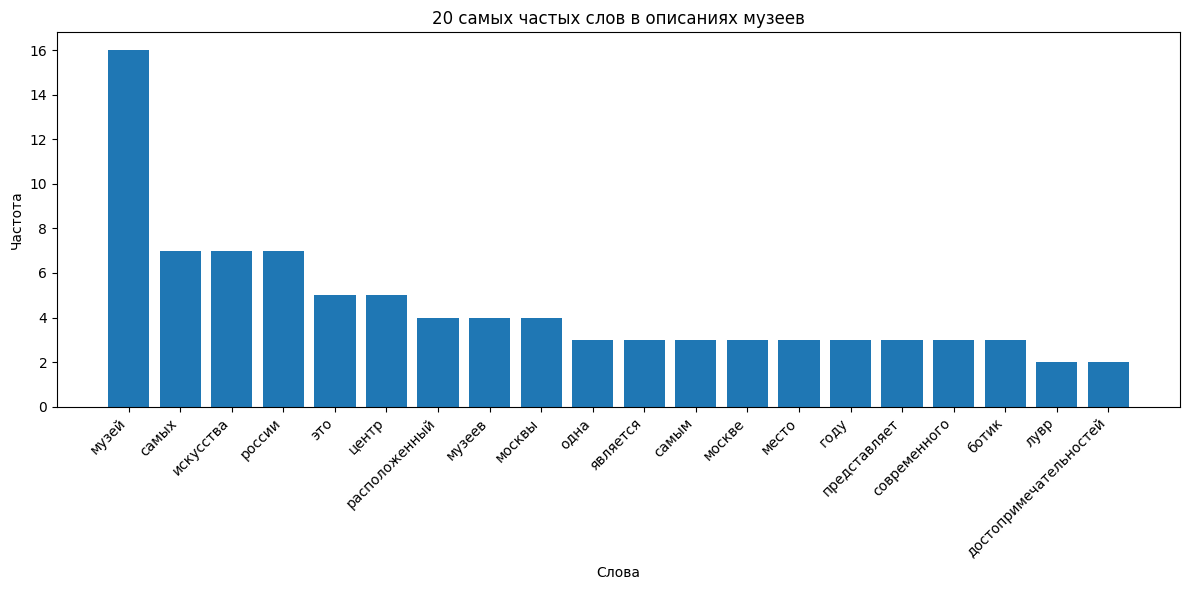

20 самых частых слов: [('музей', 16), ('самых', 7), ('искусства', 7), ('россии', 7), ('это', 5), ('центр', 5), ('расположенный', 4), ('музеев', 4), ('москвы', 4), ('одна', 3), ('является', 3), ('самым', 3), ('москве', 3), ('место', 3), ('году', 3), ('представляет', 3), ('современного', 3), ('ботик', 3), ('лувр', 2), ('достопримечательностей', 2)]

Частота упоминания городов:
 City
Москва             18
Россия              6
Париж               2
Санкт-Петербург     2
Минск               1
Нью-Йорк            1
Мадрид              1
Стамбул             1
Лондон              1
Флоренция           1
Барселона           1
Пушкин              1
Name: count, dtype: int64


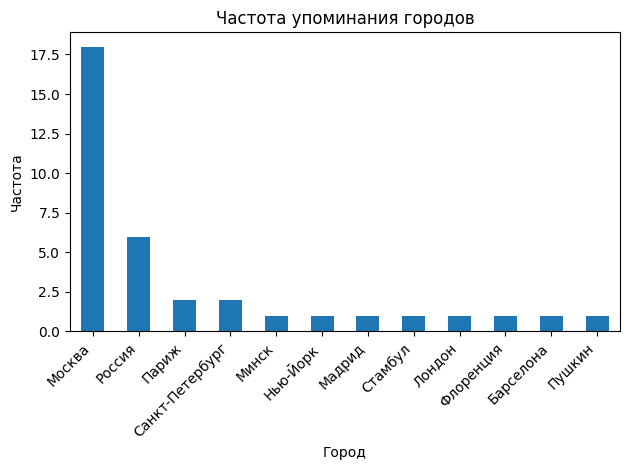

In [13]:
# Загрузка данных из CSV-файла
df = pd.read_csv("museums.csv", encoding='utf-8')
nltk.download('punkt_tab')
nltk.download('stopwords')



def clean_text(text):
    """Очищает текст от пунктуации и приводит к нижнему регистру."""
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text


def analyze_text(text_column, output_filename="cleaned_museums.csv"):
    """Проводит разведочный анализ текста."""
    cleaned_descriptions = text_column.apply(clean_text)

    # Сохраняем очищенные данные в новый CSV-файл
    df_cleaned = df.copy()
    df_cleaned['Description'] = cleaned_descriptions
    df_cleaned.to_csv(output_filename, index=False, encoding='utf-8')
    print(f"Очищенные данные сохранены в {output_filename}")

    all_descriptions = " ".join(text_column.astype(str).tolist())
    all_descriptions = clean_text(all_descriptions)
    words = word_tokenize(all_descriptions)

    stop_words = set(stopwords.words('russian'))
    words = [w for w in words if not w in stop_words]

    word_counts = Counter(words)
    most_common = word_counts.most_common(20)

    words, counts = zip(*most_common)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.xticks(rotation=45, ha='right')
    plt.title('20 самых частых слов в описаниях музеев')
    plt.xlabel('Слова')
    plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()

    return most_common


# Анализ описаний музеев
most_common_words = analyze_text(df['Description'])
print("20 самых частых слов:", most_common_words)

city_counts = df['City'].value_counts()
print("\nЧастота упоминания городов:\n", city_counts)

# Построение диаграммы для городов
city_counts.plot(kind='bar')
plt.title('Частота упоминания городов')
plt.xlabel('Город')
plt.ylabel('Частота')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



